In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import Counter
df1 = pd.read_csv('prueba1_datos (1).csv', sep =  '  '  , delimiter=",")
df1 = df1.drop(df1.columns[0], axis=1)
print(df1.head())
print(f'Shape :{df1.shape}')
print(df1.info())
print(df1.isnull().sum())
df1 = df1.dropna()
print(df1.isnull().sum())
df2 = pd.read_csv('noc_regions.csv', sep =  '  '  , delimiter=",")
df2 = df2.drop(df2.columns[0], axis=1)
#print(df2.head())
print(f'Shape :{df2.shape}')
print(df2.info())
print(df2.isnull().sum())
df2 = df2.dropna()
print(df2.isnull().sum())

                       Name Sex   Age  Height  Weight            Team  NOC  \
0                 A Dijiang   M  24.0   180.0    80.0           China  CHN   
1                  A Lamusi   M  23.0   170.0    60.0           China  CHN   
2       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark  DEN   
3      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden  DEN   
4  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands  NED   

         Games  Year  Season       City          Sport  \
0  1992 Summer  1992  Summer  Barcelona     Basketball   
1  2012 Summer  2012  Summer     London           Judo   
2  1920 Summer  1920  Summer  Antwerpen       Football   
3  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's Football   NaN  
3     

In [2]:
print(df1['Name'].describe().T)
print(df1['Sex'].describe().T)
print(df1['Age'].describe())
print(df1['Height'].describe().T)
print(df1['Weight'].describe().T)
print(df1['Team'].describe().T)
print(df1['NOC'].describe().T)
print(df1['Games'].describe().T)
print(df1['Year'].describe().T)
print(df1['Season'].describe().T)
print(df1['City'].describe().T)
print(df1['Sport'].describe().T)
print(df1['Event'].describe().T)
print(df1['Medal'].describe().T)

count                       30181
unique                      20732
top       Michael Fred Phelps, II
freq                           28
Name: Name, dtype: object
count     30181
unique        2
top           M
freq      19831
Name: Sex, dtype: object
count    30181.000000
mean        25.429012
std          5.049684
min         13.000000
25%         22.000000
50%         25.000000
75%         28.000000
max         66.000000
Name: Age, dtype: float64
count    30181.000000
mean       177.642358
std         10.924188
min        136.000000
25%        170.000000
50%        178.000000
75%        185.000000
max        223.000000
Name: Height, dtype: float64
count    30181.000000
mean        73.753554
std         15.004992
min         28.000000
25%         63.000000
50%         73.000000
75%         83.000000
max        182.000000
Name: Weight, dtype: float64
count             30181
unique              263
top       United States
freq               4273
Name: Team, dtype: object
count     30181

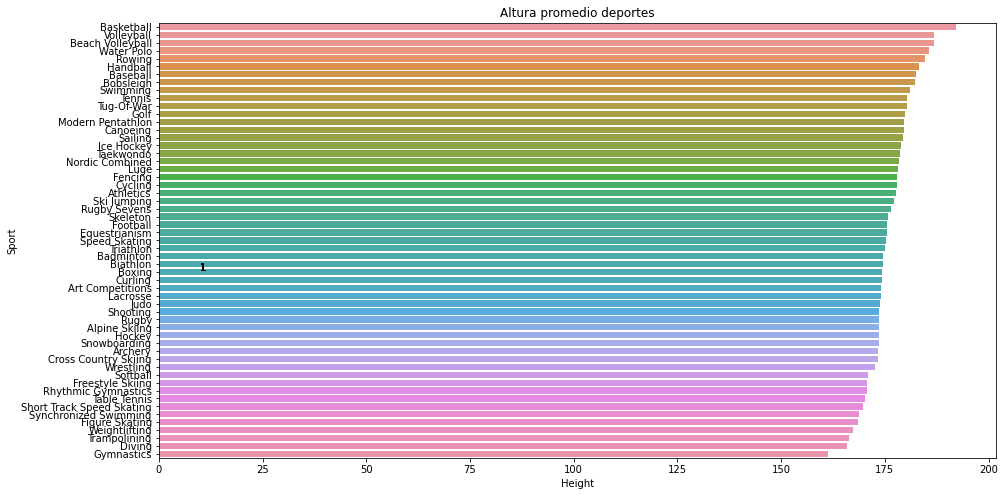

In [48]:
df_clean = df1[['Height','Name', 'Sex', 'Team', 'NOC', 'Games', 'Season', 'City', 'Sport', 'Event', 'Medal', ]] 
altura = df_clean.groupby(by = 'Sport')['Height'].mean().reset_index()
altura = altura[altura['Height'] > 0]
altura = altura.sort_values(by = 'Height', ascending = False)
altura.head(50)

fig_dim = (15,5)
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.barplot(x = 'Height', y = 'Sport', data = altura)
plt.title('Altura promedio deportes')

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+10, p.get_height()+ 30))
#el deporte en que la altura es mas alta es el basketball y el de menor altura es el de 

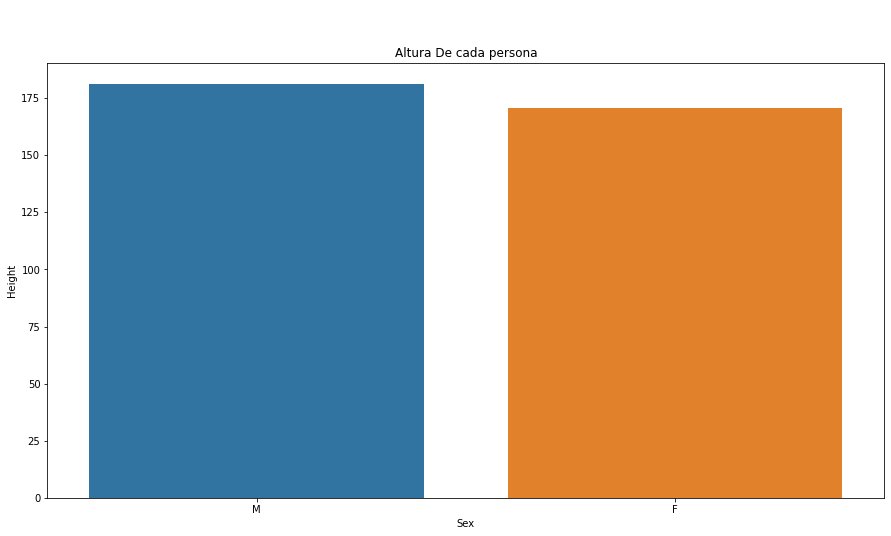

In [56]:
df_clean = df1[['Height','Name', 'Sex', 'Team', 'NOC', 'Games', 'Season', 'City', 'Sport', 'Event', 'Medal', ]] 
altura_sex = df_clean.groupby(by = 'Sex')['Height'].mean().reset_index()
altura_sex = altura_sex[altura_sex['Height'] > 0]
altura_sex = altura_sex.sort_values(by = 'Height', ascending = False)
altura_sex.head(50)

fig_dim = (15,5)
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.barplot(x = 'Sex', y = 'Height', data = altura_sex)
plt.title('Altura promedio de competidores segun su sexo')

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() , p.get_height()+ 30))

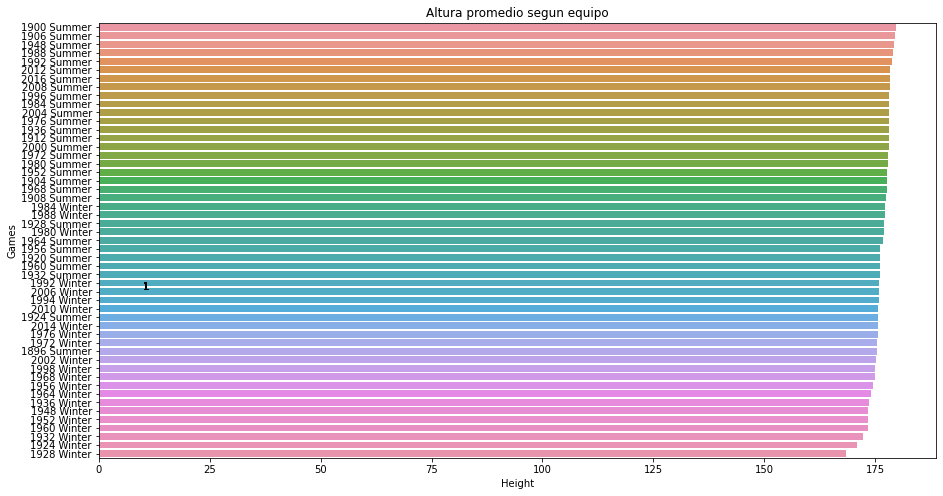

In [73]:
df_clean = df1[['Height','Name', 'Sex', 'Team', 'NOC', 'Games', 'Season', 'City', 'Sport', 'Event', 'Medal', ]] 
altura = df_clean.groupby(by = 'Games')['Height'].mean().reset_index()
altura = altura[altura['Height'] > 160]
altura = altura.sort_values(by = 'Height', ascending = False)
altura.head(50)

fig_dim = (15,5)
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.barplot(x = 'Height', y = 'Games', data = altura, n_boot=1000)
plt.title('Altura promedio segun equipo')

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+10, p.get_height()+ 30))

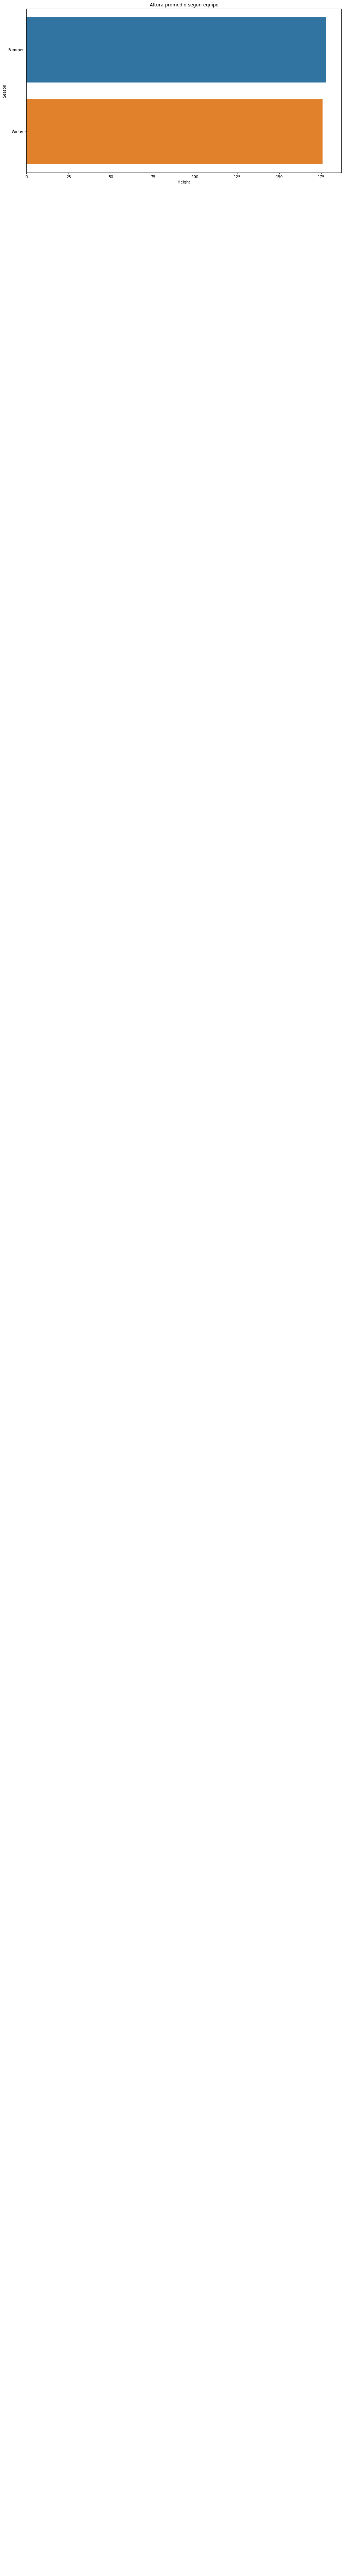

In [74]:
df_clean = df1[['Height','Name', 'Sex', 'Team', 'NOC', 'Games', 'Season', 'City', 'Sport', 'Event', 'Medal', ]] 
altura = df_clean.groupby(by = 'Season')['Height'].mean().reset_index()
altura = altura[altura['Height'] > 160]
altura = altura.sort_values(by = 'Height', ascending = False)
altura.head(50)

fig_dim = (15,5)
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.barplot(x = 'Height', y = 'Season', data = altura, capsize=.2)
plt.title('Altura promedio segun equipo')

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+10, p.get_height()+ 30))

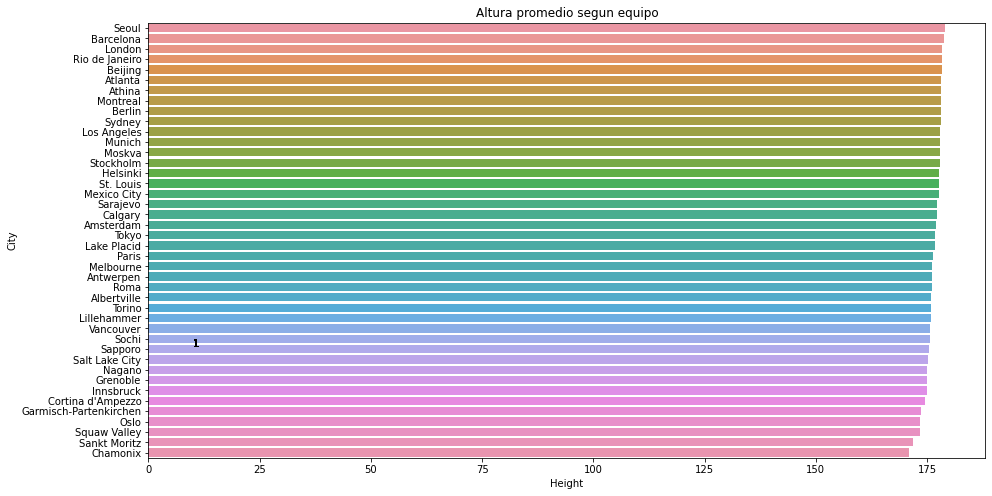

In [79]:
df_clean = df1[['Height','Name', 'Sex', 'Team', 'NOC', 'Games', 'Season', 'City', 'Sport', 'Event', 'Medal', ]] 
altura = df_clean.groupby(by = 'City')['Height'].mean().reset_index()
altura = altura[altura['Height'] > 160]
altura = altura.sort_values(by = 'Height', ascending = False)
altura.head(50)

fig_dim = (15,5)
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.barplot(x = 'Height', y = 'City', data = altura)
plt.title('Altura promedio segun equipo')

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+10, p.get_height()+ 30))

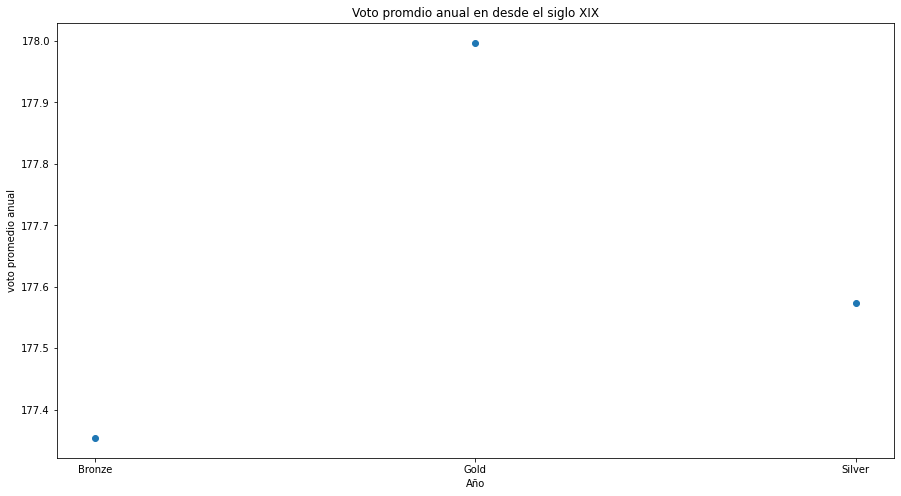

In [86]:
 df_clean = df1[['Height','Name', 'Sex', 'Team', 'NOC', 'Games', 'Season', 'City', 'Sport', 'Event', 'Medal', ]] 
 df_clean= df_clean.groupby(by = 'Medal')['Height'].mean().reset_index()
df_clean
plt.figure(figsize = (15, 8))
plt.scatter(df_clean['Medal'], df_clean['Height'])
plt.xlabel('Año')
plt.ylabel('voto promedio anual')
plt.title('Voto promdio anual en desde el siglo XIX')
plt.show()

In [87]:
 df_clean = df1[['Height','Name', 'Sex', 'Team', 'NOC', 'Games', 'Season', 'City', 'Sport', 'Event', 'Medal', ]] 
 df_clean= df_clean.groupby(by = 'Team')['Height'].mean().reset_index()
df_clean
plt.figure(figsize = (15, 8))
plt.scatter(df_clean['Team'], df_clean['Height'])
plt.xlabel('Año')
plt.ylabel('voto promedio anual')
plt.title('Voto promdio anual en desde el siglo XIX')
plt.show()

KeyboardInterrupt: 